  # <h1><center>***FRENTE DE TODOS - PASO 2019***</center></h1>

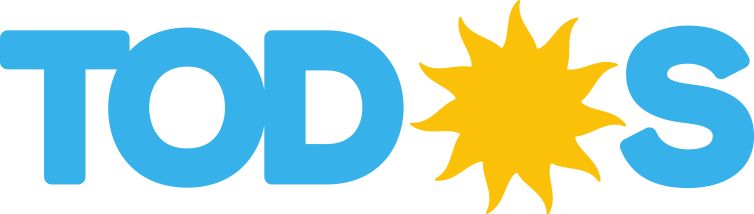



# **LIMPIEZA DEL DATASET**


---


In [1]:
!pip install nbconvert
import pandas as pd
import numpy as np
import sys

In [ ]:
#Carga del DataSet                                                             
t_url = 'https://raw.githubusercontent.com/taodeying/MET4OP/master/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv'
PASO_2019 = pd.read_csv(t_url)

In [ ]:
#Chequeo de valores nulos en la data
t_Missing_PASO_2019 = PASO_2019.isnull().values.any()                                         
if t_Missing_PASO_2019 == True:
  sys.exit("Atención hay valores missing. Revisar datos.")

In [ ]:
#Eliminacion de columnas y registros no relevantes al analisis
PASO_2019.drop(['CODIGO_DISTRITO'], axis = 1, inplace = True)                                 #Como analizamos solo CABA la columna CODIGO_DISTRITO no nos sirve ¡Adiós!
PASO_2019 = PASO_2019[PASO_2019['CODIGO_CATEGORIA'] == 100000000000]                          #Me quedo solo con la categoría Presidente y Vicepresidente
PASO_2019.loc[PASO_2019.CODIGO_CATEGORIA == 100000000000, 'CODIGO_CATEGORIA'] = 1             #Reemplazo el código de la categoría por uno más legible

PASO_2019.drop(['NOMBRE_REGION'], axis = 1, inplace = True)                                   #Como vamos a usar CODIGO_SECCION, NOMBRE_REGION no nos sirve.

In [ ]:
#Reformatea valores en columnas para hacerlos más legibles/trabajables

PASO_2019['CODIGO_SECCION'] = PASO_2019['CODIGO_SECCION'].astype(str)                         #Pasamos a string CODIGO_SECCION
PASO_2019['CODIGO_SECCION'] = PASO_2019['CODIGO_SECCION'].str[2:4]                            #Substring a los últimos 2 dígitos
PASO_2019['CODIGO_SECCION'] = PASO_2019['CODIGO_SECCION'].astype(int)                         #La volvemos a convertir a int
                                                                                              #Repetimos con CODIGO_CIRCUITO
PASO_2019['CODIGO_CIRCUITO'] = PASO_2019['CODIGO_CIRCUITO'].astype(str)                       #Pasamos a string CODIGO_CIRCUITO
PASO_2019['CODIGO_CIRCUITO'] = PASO_2019['CODIGO_CIRCUITO'].str[-3:]                          #Substring a los últimos 3 dígitos
PASO_2019['CODIGO_CIRCUITO'] = PASO_2019['CODIGO_CIRCUITO'].astype(int)                       #La volvemos a convertir a int

                                                                                              #Repetimos con CODIGO_MESA (Ya es una columna str)
PASO_2019['CODIGO_MESA'] = PASO_2019['CODIGO_MESA'].str[-5:-1]                                #Substring al número de mesa
PASO_2019['CODIGO_MESA'] = PASO_2019['CODIGO_MESA'].astype(int)                               #La convertimos en int

In [ ]:
#En las PASO cuentan todos los votos válidos, eliminación de los demás.

t_No_cuentan = ['VII','VN','VR']                                                              
PASO_2019 = PASO_2019[PASO_2019['CODIGO_AGRUPACION'].isin(t_No_cuentan) == False]

In [ ]:
#Limpieza de Categorias de Agrupaciones, la agrupación 0 pasará a ser el voto en blanco y las demás son abreviadas

t_Cero_PASO_2019 = PASO_2019[PASO_2019["CODIGO_AGRUPACION"] == "0"]                           #Me fijo que el CODIGO_AGRUPACION 0 se encuentre disponible
t_Contar = t_Cero_PASO_2019.CODIGO_AGRUPACION.count()                                      
if t_Contar >0:
  sys.exit("Ya hay una agrupación con código cero")

PASO_2019['CODIGO_AGRUPACION']= PASO_2019['CODIGO_AGRUPACION'].replace("VB","0")              #A los votos en blanco le ponto CODIGO_AGRUPACION 0
PASO_2019['CODIGO_AGRUPACION'] = PASO_2019['CODIGO_AGRUPACION'].astype(int)                   #Paso CODIGO_AGRUPACION a int
                                                                                              #Acorto NOMBRE_CATEGORIA 
PASO_2019['NOMBRE_CATEGORIA']= PASO_2019['NOMBRE_CATEGORIA'].replace\
("Presidente y Vicepresidente de la República", "Presidente")                   

t_Agrupaciones = pd.unique(PASO_2019['NOMBRE_AGRUPACION'])                                    #Creo lista con todos los nombres de las agrupaciones 
PASO_2019['AGRUPACION'] = PASO_2019['NOMBRE_AGRUPACION']                                      #Duplico la columna NOMBRE_AGRUPACION para reemplazarla por nombres cortos
                                                                                              #Creo lista de nombres cortos
t_Agrupaciones_Corto = ["MAS","NOS","FP","FIT","JxC","FdT","CF","PA","MAV",\
"Unite","Blanco"]                                                                                
t_Largo_1 = len(t_Agrupaciones)                                                               #Cotejo que todas las agrupaciones tengan una abreviatura
t_Largo_2 = len(t_Agrupaciones_Corto)                                               
if t_Largo_1 != t_Largo_2:
  sys.exit("Revisar la longitud de las listas")

for t_i, t_j in zip(t_Agrupaciones,t_Agrupaciones_Corto):                                     #Loop que reemplaza AGRUPACION por sus abreviaturas
  PASO_2019['AGRUPACION']= PASO_2019['AGRUPACION'].replace(t_i,t_j)

In [ ]:
#Cambio de nombre de columnas y limpieza de variables temporales

t_Renombrar = ['CODIGO_SECCION','CODIGO_CIRCUITO','CODIGO_MESA',\
'CODIGO_CATEGORIA','CODIGO_AGRUPACION','VOTOS_AGRUPACION',      \
'NOMBRE_CATEGORIA','NOMBRE_AGRUPACION']

t_Nuevos_Nombres = ['COMUNA','CIRCUITO','MESA','ID_CATEGORIA',  \
'ID_AGRUPACION','VOTOS','CATEGORIA','AGRUPACION_LARGO']

for t_i, t_j in zip(t_Renombrar,t_Nuevos_Nombres):                                            #Loop que reemplaza los nombres de las columnas
  PASO_2019.rename(columns={ t_i : t_j}, inplace=True)

for temp in dir():                                                                                                                                                   
    if temp.startswith('t_'):
        del globals()[temp]
del temp
PASO_2019

,COMUNA,CIRCUITO,MESA,ID_CATEGORIA,ID_AGRUPACION,VOTOS,CATEGORIA,AGRUPACION_LARGO,AGRUPACION
0,1,1,1,1,13,1,Presidente,MOVIMIENTO AL SOCIALISMO,MAS
1,1,1,1,1,131,5,Presidente,FRENTE NOS,NOS
2,1,1,1,1,132,2,Presidente,FRENTE PATRIOTA,FP
3,1,1,1,1,133,15,Presidente,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,FIT
4,1,1,1,1,135,85,Presidente,JUNTOS POR EL CAMBIO,JxC
...,...,...,...,...,...,...,...,...,...
103718,15,167,7413,1,137,29,Presidente,CONSENSO FEDERAL,CF
103719,15,167,7413,1,36,2,Presidente,PARTIDO AUTONOMISTA,PA
103720,15,167,7413,1,57,1,Presidente,MOVIMIENTO DE ACCION VECINAL,MAV
103721,15,167,7413,1,87,10,Presidente,UNITE POR LA LIBERTAD Y LA DIGNIDAD,Unite


# **ANÁLISIS**

Los resultados electorales del Frente de Todos (FDT) en las elecciones presidenciales Primarias Abiertas Simultaneas y Obligatorias, en el distrito de la Ciudad de Buenos Aires, fueron positivos en comparación con los de las últimas dos elecciones presidenciales en las que se posicionó el distrito.

Nuestro analisis se desglozará fundamentalmente por comuna, ya que consideramos que las diferencias numéricas porcentuales entre cada una de ellas amerita seleccionarlas como nuestra unidad de analisis, incluso sin necesidad de ahondar en las diferencias sociales y económicas de los distintos distritos de la ciudad.

#PORCENTAJE POR COMUNA


---



La performance general del FDT a lo largo de todos los distritos es superior a la habitual. Incluso en comparación con el rendimiento en elecciones locales, estos resultados hubieran forzado un ballotage en el distrito, objetivo no logrado en las elecciones a Jefe de Gobierno.

El FDT logró imponerse en primer o segundo lugar en todos los distritos

In [ ]:
#Creo tabla de votos por comuna
VOT_X_COMUNA = pd.crosstab(PASO_2019.AGRUPACION, PASO_2019.COMUNA, values=\
PASO_2019.VOTOS, aggfunc='sum', margins = True, margins_name="Total")
PORC_X_COMUNA = VOT_X_COMUNA                                                    #Creo la tabla de porcentaje
cols = list(PORC_X_COMUNA.columns)                                              #Tomo el nombre de las columnas y lo hago lista
                                                                                #Calculo los votos de cada agrupación sobre el total de la comuna y el total de votos
PORC_X_COMUNA = round(PORC_X_COMUNA[cols].div(PORC_X_COMUNA[cols].sum(axis=\
0), axis=1).multiply(100 * 2), 2)
PORC_X_COMUNA

COMUNA,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Total
AGRUPACION,,,,,,,,,,,,,,,,
Blanco,3.04,2.41,3.27,4.28,3.16,3.14,3.49,3.59,3.31,3.44,3.20,3.13,2.93,2.64,3.55,3.23
CF,6.87,6.38,8.36,7.88,9.16,9.55,9.63,7.85,10.40,10.75,10.47,9.84,7.75,7.09,9.04,8.73
FIT,3.61,2.53,4.42,4.28,4.75,4.15,3.95,3.80,3.96,4.39,4.01,4.10,3.26,3.01,4.79,3.92
FP,0.31,0.17,0.35,0.33,0.28,0.22,0.27,0.33,0.34,0.29,0.29,0.25,0.18,0.19,0.26,0.27
FdT,34.97,18.96,37.24,42.72,36.26,30.51,36.10,48.98,38.85,34.51,31.43,30.41,21.74,22.90,37.08,33.04
JxC,45.12,63.32,40.15,34.85,40.16,46.26,40.13,30.11,36.86,40.14,44.15,45.86,58.14,58.52,39.61,44.71
MAS,0.98,0.81,1.19,1.09,1.37,1.36,1.24,0.80,1.04,1.26,1.14,1.17,0.97,0.93,1.30,1.11
MAV,0.13,0.07,0.13,0.17,0.13,0.10,0.14,0.21,0.14,0.14,0.14,0.13,0.08,0.08,0.13,0.12
NOS,1.46,1.78,1.23,1.20,1.04,0.86,1.09,1.34,1.21,1.26,1.14,1.08,1.10,1.14,0.84,1.17


El PROMEDIO de votos por comuna nos permite distinguir cual fue un buen rendimiento y cual no. Aquellos mayores que el promedio implican uno bueno, y menores uno malo.
Lo mismo puede decirse de la brecha existente entre el ganador de la elección, JxC, y el segundo lugar, el FdT. Donde la diferencia fuera menor a 10.78 puntos, implica un buen rendimiento del FdT, que siempre entra al distrito con desventaja. 

In [ ]:
#Porcentajes de las cuatro fuerzas políticas más importantes
PORC_X_COMUNA_SIN_TOTAL = PORC_X_COMUNA.drop('Total', axis=1)
PORC_X_COMUNA_SIN_TOTAL
PORC_X_COMUNA_SIN_TOTAL['PROMEDIO'] = round(PORC_X_COMUNA.mean(axis=1),2)
PORC_X_COMUNA_SIN_TOTAL.filter(['FdT','JxC', 'FIT', 'CF'], axis=0)

COMUNA,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,PROMEDIO
AGRUPACION,,,,,,,,,,,,,,,,
FdT,34.97,18.96,37.24,42.72,36.26,30.51,36.10,48.98,38.85,34.51,31.43,30.41,21.74,22.90,37.08,33.48
JxC,45.12,63.32,40.15,34.85,40.16,46.26,40.13,30.11,36.86,40.14,44.15,45.86,58.14,58.52,39.61,44.26
FIT,3.61,2.53,4.42,4.28,4.75,4.15,3.95,3.80,3.96,4.39,4.01,4.10,3.26,3.01,4.79,3.93
CF,6.87,6.38,8.36,7.88,9.16,9.55,9.63,7.85,10.40,10.75,10.47,9.84,7.75,7.09,9.04,8.73


La columna CONDICION evalua que la sumatoria entre las terceras fuerzas sea mayor a su promedio, es decir superior a 12.66 y que la diferencia entre los ganadores tambien sea mayor que el promedio, 10.78. Cuando esto nos devuelve True, estamos ante la excepcion a la regla que explicamos abajo, el escenario que perjudica al FdT.

Existe una relación entre el caudal de votos de las terceras fuerzas (FIT y CF), y la ventaja de uno de los dos contendientes principales. Cuando la brecha entre el primer y segundo lugar se amplía, las terceras fuerzas pierden caudal de votos.
Esta relación tiene tres excepciones: las comunas 6, 11, y 12. En ellas las terceras fuerzas juntaron un caudal de votos mayor a sus promedios, a pesar de la brecha entre las dos fuerzas mayoritarias. En los tres casos el perdedor fue el Frente de Todos.

En distritos en los que la performance del ganador no es cercana al 50% o superior, y las terceras fuerzas tienen buena performance, la mala performance del FdT es caracteristica. De la misma manera, en la única comuna en la que la ventaja del FdT es decisiva, la número 8,  las terceras fuerzas tuvieron un mal rendimiento.

In [ ]:
#Tablas para estudio de relación entre la diferencia de los ganadores y la sumatoria de las terceras fuerzas (FIT Y CF)

#Sumo valores de FIT y CF
TERCERAS_FUERZAS = PORC_X_COMUNA_SIN_TOTAL.iloc[1:3].sum()

#Extraigo resultados del FdT
FDT = PORC_X_COMUNA_SIN_TOTAL.iloc[4]

#Extraigo resultados de JxC
JXC = PORC_X_COMUNA_SIN_TOTAL.iloc[5]

#Resto a JxC los valores de FdT y vuelvo los valores absolutos para evadir negativos                                            
DIFERENCIA_GANADORES = JXC.subtract(FDT).abs()
DIFERENCIA_GANADORES

#concatenamos las tablas
RELACION_VOTOS = pd.concat([TERCERAS_FUERZAS, DIFERENCIA_GANADORES], axis=1,)   
RELACION_VOTOS.rename(columns={0: "TERCERAS_FUERZAS", 1:"DIFERENCIA_GANADORES"}, inplace=True)
RELACION_VOTOS["CONDICION"] = RELACION_VOTOS["DIFERENCIA_GANADORES"].\
between(10.78, 100, inclusive=True) & RELACION_VOTOS['TERCERAS_FUERZAS'].between(12.66, 100, inclusive=True)

RELACION_VOTOS

,TERCERAS_FUERZAS,DIFERENCIA_GANADORES,CONDICION
COMUNA,,,
1,10.48,10.15,False
2,8.91,44.36,False
3,12.78,2.91,False
4,12.16,7.87,False
5,13.91,3.90,False
6,13.70,15.75,True
7,13.58,4.03,False
8,11.65,18.87,False
9,14.36,1.99,False


Comunas con la peor y la mejor performance para el FdT

In [ ]:
MAXIMO_MINIMO = PORC_X_COMUNA.loc['FdT']

#Indices de valores maximos y minimos
MAX = PORC_X_COMUNA.loc['FdT'].idxmax()
MIN = PORC_X_COMUNA.loc['FdT'].idxmin()
#Convierto  data frame
MAXIMO_MINIMO.filter([MAX, MIN]).to_frame()


,FdT
COMUNA,
8,48.98
2,18.96


#VOTOS TOTALES POR PARTIDO EN CADA COMUNA


---



In [ ]:
VOTOS_POR_COMUNA_NOMINAL = pd.crosstab(PASO_2019.AGRUPACION, PASO_2019.COMUNA,\
values=PASO_2019.VOTOS, aggfunc='sum', margins = True, margins_name="Total" )
VOTOS_POR_COMUNA_NOMINAL

COMUNA,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Total
AGRUPACION,,,,,,,,,,,,,,,,
Blanco,3674,2493,3790,5801,3810,3968,4631,3792,3818,4031,4363,4720,4895,4102,4509,62397
CF,8305,6604,9685,10671,11063,12071,12772,8297,11999,12605,14253,14814,12963,11017,11488,168607
FIT,4368,2620,5124,5798,5740,5248,5247,4018,4568,5148,5461,6180,5457,4675,6094,75746
FP,379,178,402,443,341,279,358,354,389,339,393,383,301,298,335,5172
FdT,42299,19615,43139,57837,43785,38548,47901,51803,44797,40478,42788,45793,36370,35605,47133,637891
JxC,54568,65519,46502,47191,48489,58450,53251,31848,42504,47071,60101,69058,97275,90998,50344,863169
MAS,1186,840,1380,1473,1657,1721,1641,847,1198,1480,1557,1759,1630,1453,1648,21470
MAV,159,68,145,234,152,123,181,224,160,164,185,194,132,126,159,2406
NOS,1763,1841,1419,1622,1260,1084,1444,1421,1395,1477,1546,1621,1848,1777,1074,22592


#DISTRIBUCIÓN DEL VOTO EN COMUNAS


---



In [ ]:
VOT_X_COMUNA = pd.crosstab(PASO_2019.AGRUPACION, PASO_2019.COMUNA, values=\
PASO_2019.VOTOS, aggfunc='sum', margins = True, margins_name="Total")

DIST_X_COMUNA = VOT_X_COMUNA                                                         #Creo la tabla de distribución
cols = list(DIST_X_COMUNA.columns)                                                   #Tomo el nombre de las columnas y lo hago lista
DIST_X_COMUNA.drop(DIST_X_COMUNA.tail(1).index,inplace=True)                         #Elimino la última fila porque no me sirve
                                                                                     #Calculo porcentaje sobre el total
DIST_X_COMUNA = round(DIST_X_COMUNA[cols].div(DIST_X_COMUNA[cols].sum(axis=\
1), axis=0).multiply(100 * 2), 2)
DIST_X_COMUNA = DIST_X_COMUNA.astype({"Total": int})                                 #Paso a int el total
DIST_X_COMUNA  

COMUNA,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Total
AGRUPACION,,,,,,,,,,,,,,,,
Blanco,5.89,4.00,6.07,9.30,6.11,6.36,7.42,6.08,6.12,6.46,6.99,7.56,7.84,6.57,7.23,100
CF,4.93,3.92,5.74,6.33,6.56,7.16,7.58,4.92,7.12,7.48,8.45,8.79,7.69,6.53,6.81,100
FIT,5.77,3.46,6.76,7.65,7.58,6.93,6.93,5.30,6.03,6.80,7.21,8.16,7.20,6.17,8.05,100
FP,7.33,3.44,7.77,8.57,6.59,5.39,6.92,6.84,7.52,6.55,7.60,7.41,5.82,5.76,6.48,100
FdT,6.63,3.07,6.76,9.07,6.86,6.04,7.51,8.12,7.02,6.35,6.71,7.18,5.70,5.58,7.39,100
JxC,6.32,7.59,5.39,5.47,5.62,6.77,6.17,3.69,4.92,5.45,6.96,8.00,11.27,10.54,5.83,100
MAS,5.52,3.91,6.43,6.86,7.72,8.02,7.64,3.95,5.58,6.89,7.25,8.19,7.59,6.77,7.68,100
MAV,6.61,2.83,6.03,9.73,6.32,5.11,7.52,9.31,6.65,6.82,7.69,8.06,5.49,5.24,6.61,100
NOS,7.80,8.15,6.28,7.18,5.58,4.80,6.39,6.29,6.17,6.54,6.84,7.18,8.18,7.87,4.75,100


#GANADOR EN CADA COMUNA Y CUANTOS VOTOS SACO


---



Hay una clara diferenciación entre las comunas del norte y centro de la ciudad, y las del sur. A medida que se baja en Latitud el Frente de Todos gana votos a costa de los de JxC. Las "zonas grises", es decir el centro geográfico, de la ciudad debe ser analizada para determinar si allí existen votantes persuasibles, ya que es en estas comunas en las que las terceras fuerzas también tienen más relevancia.

In [ ]:
PASO_VOTOS = PASO_2019.groupby(['AGRUPACION','COMUNA'])[['VOTOS']].sum()
PASO_VOTOS_AGRUPADO = PASO_VOTOS.sort_values(['COMUNA','VOTOS'], ascending=False)  #ORDENO POR COMUNA Y CANTIDAD DE VOTOS
PASOS = PASO_VOTOS_AGRUPADO.groupby('COMUNA').rank(ascending=False)                #AGRUPO POR COMUNA Y ARMO RANKING
GXC = PASOS[PASOS['VOTOS'] == 1]                                                   #ME QUEDO CON EL 1
GXC.sort_values('AGRUPACION')                                                      #ORDENO POR AGRUPACION
SALE = GXC.merge(PASO_VOTOS_AGRUPADO, on=['AGRUPACION','COMUNA'], how='left')      #LE JOINEO LA CANTIDAD DE VOTOS
SALE2=SALE.sort_values('AGRUPACION')                                               #ORDENO POR AGRUPACION
SALE3 = SALE2.pop('VOTOS_y').to_frame()                                            #BORRO LA POSICION EN LA QUE SALIO YA QUE TODOS SON 1
SALE3= SALE3.rename(columns={'VOTOS_y':'VOTOS'})                                   #CAMBIO NOMBRE A LA VARIABLE
SALE3

VOTOS
AGRUPACION COMUNA       
FdT        9       44797
           8       51803
           4       57837
JxC        15      50344
           14      90998
           13      97275
           12      69058
           11      60101
           10      47071
           7       53251
           6       58450
           5       48489
           3       46502
           2       65519
           1       54568

#POSICION DEL FDT POR COMUNA Y CANTIDAD DE VOTOS


---



El FdT ha logrado mantener la primer o segunda posición en todas las comunas, objetivo importante que no se ha logrado en todas las elecciones.

In [ ]:
FDT = PASOS.reset_index(level=0)                                                     #LE DOY NUEVO INDICE A LA TABLA
FDT_SOLO = FDT[FDT.AGRUPACION=='FdT'].sort_values("COMUNA")                          #ME QUEDO SOLO CON FDT Y ORDENO POR COMUNA
TOTAL = FDT_SOLO.merge(PASO_VOTOS_AGRUPADO, on=['AGRUPACION','COMUNA'], how='left')  #LE JOINEO LA CANTIDAD DE VOTOS
PIOLA = TOTAL.rename(columns={'VOTOS_x':'POSICION','VOTOS_y':'VOTOS'})               #RENOMBRO LAS COLUMNAS
PIOLA = PIOLA.astype({"POSICION": int})                                              #PASO POSICION A INT ASÍ QUEDA MÁS PROLIJO
PIOLA['VOTOS'] = PIOLA['VOTOS'].map("{:,}".format)                                   #FORMATO VOTOS CON SEPARACIÓN DE MILES      
PIOLA

,AGRUPACION,POSICION,VOTOS
COMUNA,,,
1,FdT,2,"42,299"
2,FdT,2,"19,615"
3,FdT,2,"43,139"
4,FdT,1,"57,837"
5,FdT,2,"43,785"
6,FdT,2,"38,548"
7,FdT,2,"47,901"
8,FdT,1,"51,803"
9,FdT,1,"44,797"


# **CONCLUSIÓN**

Los resultados de las PASO 2019 fueron positivos para el Frente de Todos considerando que CABA es un distrito históricamente reacio al peronismo. Dos elementos del analisis son particularmente interesantes, la relación entre los resultados positivos para las terceras fuerzas y la mala performance del FdT, y por otro lado como este fenomeno se ve acentuado en las comunas del centro geográfico de la Ciudad de Buenos Aires, donde a su vez los resultados entre la primera y la segunda fuerza son más ajustados. Esto nos lleva a pensar que si el FdT desea crecer en su caudal de votos, debe encontrar la forma de convencer a los ciudadanos de esas comunas, o aumentar la participación en las otras. 